# Dimensionality Reduction

In this exercise you'll apply a variety of dimensionality reduction to a relatively high dimensional dataset and investigate how they perform in visualizing the data as well as working with a simple supervised learning algorithm.


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import scipy

np.random.seed(0)
plt.style.use("ggplot")

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score


In [0]:
data = load_breast_cancer()

In [4]:
features = pd.DataFrame(data["data"], columns=data["feature_names"])
target = pd.Series(data["target"], name="class")
print(data["DESCR"])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [0]:
perplexities = [5, 20, 30, 50, 100]
iters = [250, 1000, 3000]

The next code block will take some time to run, you might want to come back to this later or continue to the next part while it runs.

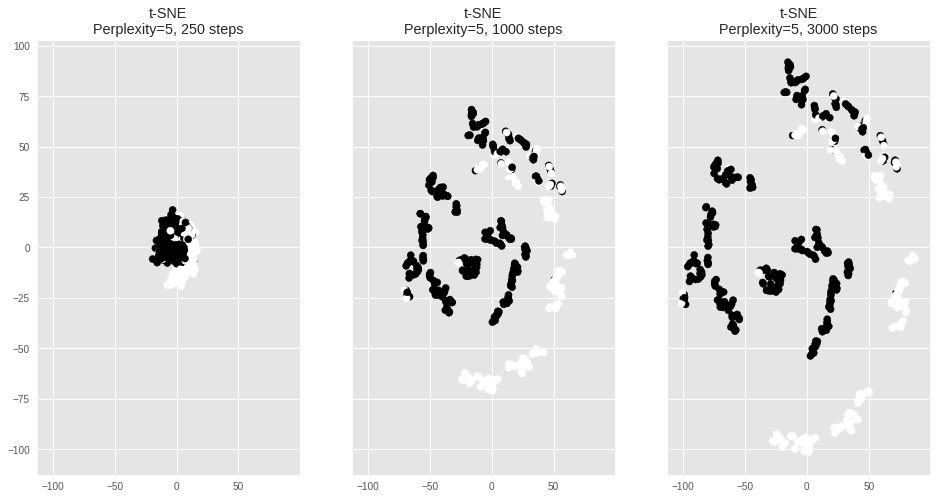

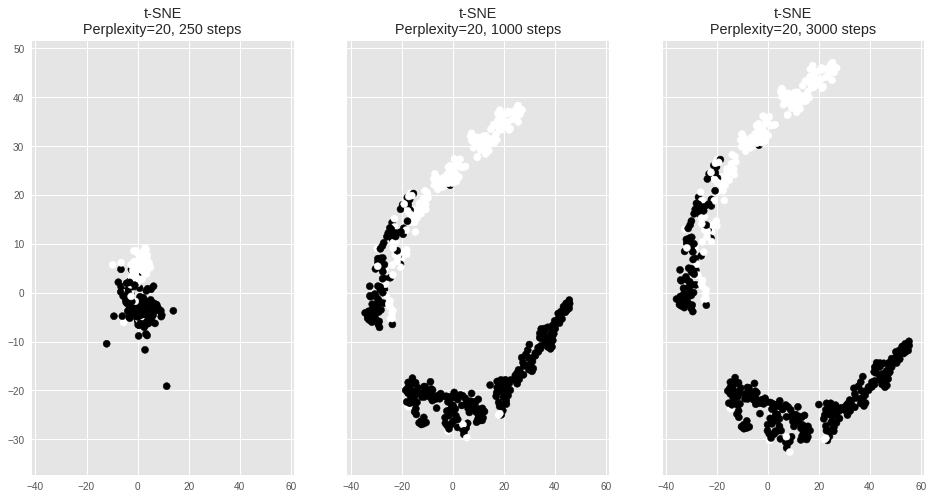

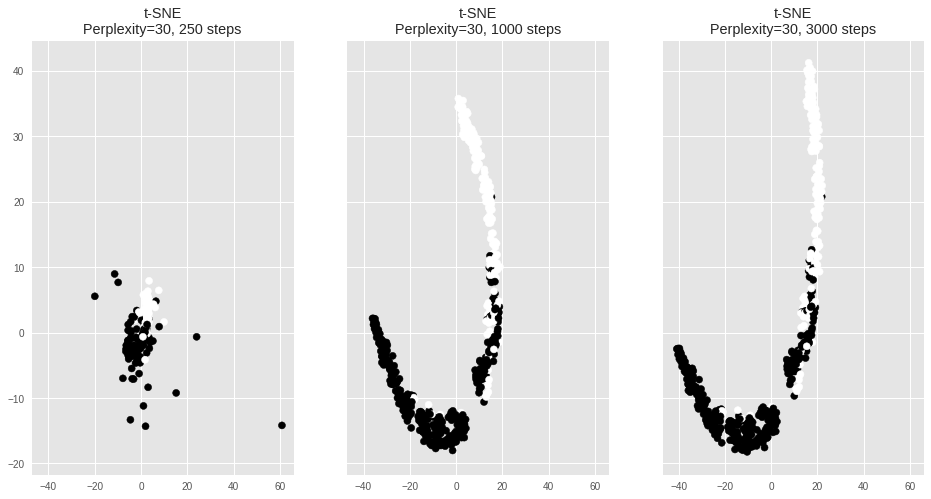

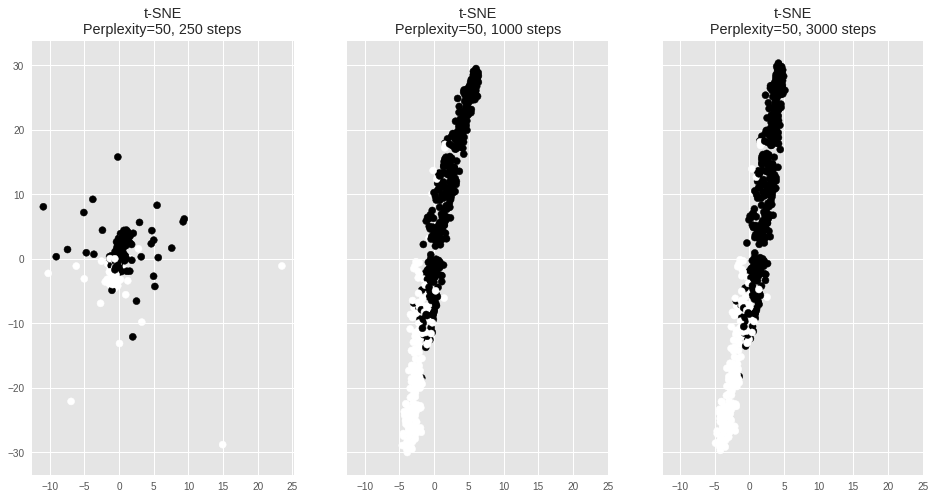

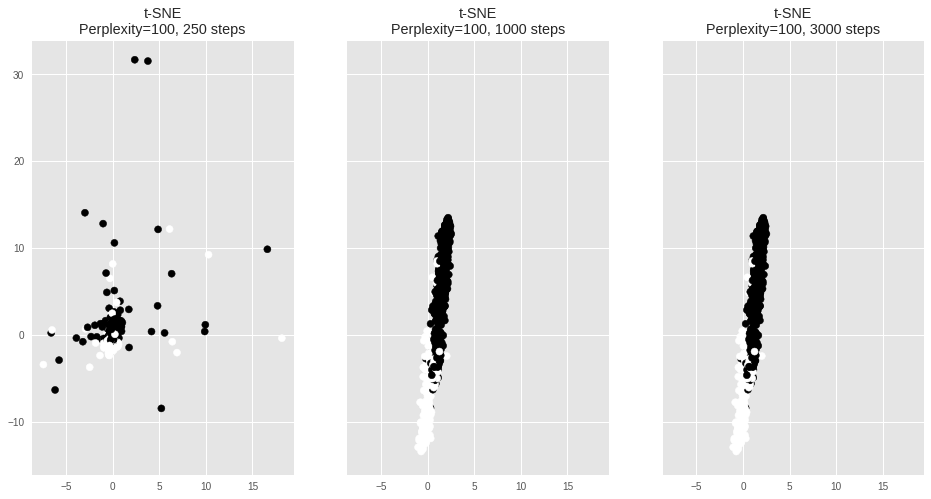

In [25]:
tsne_embeddings = []
# Use random_state=0 for TSNE
for perplexity in perplexities:
    fig, axes = plt.subplots(nrows=1, ncols=len(iters), figsize=(16, 8), sharex=True, sharey=True)
    for i,n in enumerate(iters):
        # YOUR CODE HERE
        # raise NotImplementedError()
        tsne_embedding = TSNE(perplexity = perplexity, n_iter = n, random_state=0).fit_transform(X_train)
        axes[i].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=y_train)
        axes[i].set_title(f"t-SNE\nPerplexity={perplexity}, {n} steps")
    tsne_embeddings.append(tsne_embedding)
    plt.show()

In [0]:
assert tsne_embedding.shape == (455,2)
assert len(tsne_embeddings) == 5

Next, we'll calculate the spectral embedding for the data.

> *Optional* - select an affinity to create the affinity matrix for the manifold graph. You can select a [pairwise distance method](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html) to call with [squareform](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform). 

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


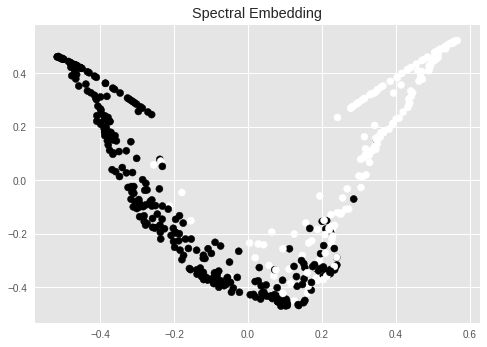

In [34]:
# Now use Spectral Embeddings to calculate the embedding of the data
# Save the embedding to spectral_embedding, and transformer to spectral
# YOUR CODE HERE
# raise NotImplementedError()
spectral = SpectralEmbedding()
spectral_embedding = spectral.fit_transform(X_train)
plt.scatter(spectral_embedding[:, 0], spectral_embedding[:, 1], c=y_train)
plt.title("Spectral Embedding")
plt.show()

In [0]:
assert spectral
assert spectral_embedding.shape == (455, 2)

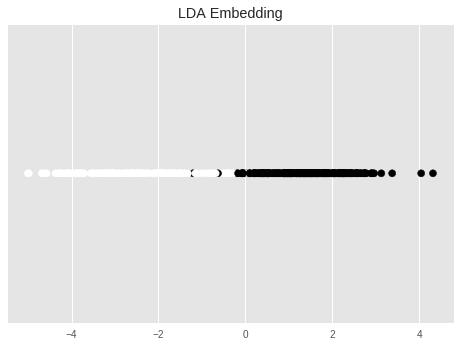

In [38]:
# Now use LDA to calculate the embedding of the data
# Save the embedding to lda_embedding, and transformer to lda
# YOUR CODE HERE
# raise NotImplementedError()
lda = LinearDiscriminantAnalysis()
lda_embedding = lda.fit_transform(X_train,y_train)
plt.scatter(lda_embedding, [0]*len(lda_embedding), c=y_train)
plt.yticks([])
plt.title("LDA Embedding")
plt.show()

In [0]:
assert lda
assert lda_embedding.shape == (455, 1)

We will now investigate how these methods perform on classification with a basic Linear SVM Classifier.

Since t-SNE, and Spectral Embedding do not save a projection, we can not transform the test data using the trained model. You will need to concatenate both X_train and X_test then select the training and test rows from the embeddings after. The [guide on merging dataframes](http://pandas.pydata.org/pandas-docs/stable/merging.html) may be useful.

For t-SNE, select a perplexity value and train a new embedding on only the test data for t-SNE. Use `n_iter` of at least 3000.

> **Optional** - Try reducing dimensionality with PCA and/or Kernel PCA and see if the results are better.

In [45]:
# Select a perplexity for t-SNE and save it to selectedPerplexity
# Create 2 embeddings `tsne_train` and `tsne_test` using a new TSNE model saved to `tsne_model`
#        fitted and transforming the whole data then manually selecting each group
# Create 2 embeddings `spectral_train` and `spectral_test` using a new Spectral Embedding model
#        saved to `spectral_model` fitted and transforming the whole data then manually 
#        selecting each group.
# Create an embedding `lda_test` from the test data using the lda model you trained
# Create 3 LinearSVC models with default settings fitted to the training embeddings
#       save them as tsne_svc, spectral_svc, and lda_svc
# YOUR CODE HERE
# raise NotImplementedError()

selectedPerplexity = 20
tsne_model = TSNE(perplexity = selectedPerplexity, n_iter = 4000, random_state=0)
tsne_train = tsne_model.fit_transform(X_train)
tsne_test = tsne_model.fit_transform(X_test)

spectral_model = SpectralEmbedding()
spectral_train = spectral_model.fit_transform(X_train)
spectral_test = spectral_model.fit_transform(X_test)

lda = LinearDiscriminantAnalysis()
lda_test = lda.fit_transform(X_test,y_test)


tsne_svc = LinearSVC().fit(tsne_train,y_train)
spectral_svc =  LinearSVC().fit(spectral_train,y_train)
lda_svc = LinearSVC().fit(lda_test,y_test)



/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [0]:
assert selectedPerplexity >= 2
assert selectedPerplexity <= 100
assert tsne_model
assert tsne_model.n_components == 2
assert tsne_model.perplexity == selectedPerplexity
assert tsne_model.n_iter >= 3000
assert tsne_train.shape == (455,2)
assert tsne_test.shape == (114,2)

assert spectral_model
assert spectral_model.n_components == 2
assert spectral_train.shape == (455,2)
assert spectral_test.shape == (114, 2)

assert lda_test.shape == (114, 1)

assert tsne_svc
assert tsne_svc.coef_.shape[1] == 2
assert spectral_svc
assert spectral_svc.coef_.shape[1] == 2
assert lda_svc
assert lda_svc.coef_.shape[1] == 1

In [47]:
print(f"The t-SNE embedding + Linear SVM scores an F-1 = {f1_score(y_test, tsne_svc.predict(tsne_test)):.3f}.")
print(f"The Spectral Embedding + Linear SVM scores an F-1 = {f1_score(y_test, spectral_svc.predict(spectral_test)):.3f}.")
print(f"The LDA + Linear SVM scores an F-1 = {f1_score(y_test, lda_svc.predict(lda_test)):.3f}.")

The t-SNE embedding + Linear SVM scores an F-1 = 0.859.
The Spectral Embedding + Linear SVM scores an F-1 = 0.510.
The LDA + Linear SVM scores an F-1 = 1.000.


Can you think of why we get these scores for the respective models? What happens if we train the same Linear SVM model on all the features?

In [48]:
all_feat_score = f1_score(y_test, LinearSVC().fit(X_train, y_train).predict(X_test))
print(f"The Linear SVM with all features scores an F-1 = {all_feat_score:.3f}.")

The Linear SVM with all features scores an F-1 = 0.957.


## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()